The CNN stucture based on paper Zhang, J., Mei, X., Liu, H., Yuan, S. and Qian, T., 2019

In [19]:
from keras.models import Sequential, Input, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, concatenate, BatchNormalization,AvgPool2D, GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import os

In [23]:
input_img1 = Input(shape=(48,48,3))
x1 = Conv2D(32, 7, strides=1, activation='relu', padding='same')(input_img1)
x2 = MaxPool2D(2, strides=2, padding='same')(x1)
x3 = Conv2D(32, 7, strides=1, activation='relu', padding='same')(x2)
x4 = concatenate([x2, x3])
x5 = MaxPool2D(2, strides=2, padding='same')(x4)
x6 = Conv2D(64, 7, strides=1, activation='relu', padding='same')(x5)
x7 = concatenate([x5, x6])
x8 = MaxPool2D(2, strides=2, padding='same')(x7)
x9 = Conv2D(64, 7, strides=1, activation='relu', padding='same')(x8)
x10 = concatenate([x8,x9])
x11 = MaxPool2D(2, strides=2)(x10)
x11 = Flatten()(x11)
x12 = Dense(4096, activation='relu')(x11)
x13 = Dense(2048, activation='relu')(x12)
output = Dense(7, activation='softmax')(x13)

model = Model(inputs=input_img1, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 48, 48, 32)   4736        input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_44 (MaxPooling2D) (None, 24, 24, 32)   0           conv2d_51[0][0]                  
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 24, 24, 32)   50208       max_pooling2d_44[0][0]           
____________________________________________________________________________________________

In [28]:
data_dir = 'FER+CK/train/'
val_dir = 'FER+CK/val/'

In [29]:
epochs = 300
batch_size = 64
target_size = (48,48)

In [30]:
datagen_train = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        shear_range=.2,
                        horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(data_dir,
                                                    target_size=target_size,
                                                    batch_size= batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True)

datagen_val = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        shear_range=.2,
                        horizontal_flip=True)

val_generator = datagen_val.flow_from_directory(val_dir,
                                                target_size=target_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb',
                                                shuffle=False) 

Found 29430 images belonging to 7 classes.
Found 6723 images belonging to 7 classes.


In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

my_callbacks = [
                EarlyStopping(monitor='val_accuracy', min_delta=1e-5, patience=20, mode='auto', verbose=1),
                ModelCheckpoint(filepath='fer_cnn.h5', monitor='accuracy', save_best_only=True, save_weights_only=False, mode='auto', verbose=1)
]

In [32]:
history = model.fit(train_generator,
                    epochs=epochs, steps_per_epoch=len(train_generator), # How many mini_batchs we have inside each epoch.
                    validation_data=val_generator,
                    callbacks=my_callbacks,
                    verbose=1)

Epoch 1/300
460/460 [==============================] - 43s 77ms/step - loss: 5.4794 - accuracy: 0.2510 - val_loss: 1.9752 - val_accuracy: 0.2848

Epoch 00001: accuracy improved from -inf to 0.25097, saving model to fer_cnn.h5
Epoch 2/300
460/460 [==============================] - 25s 55ms/step - loss: 1.8053 - accuracy: 0.3161 - val_loss: 1.7421 - val_accuracy: 0.3089

Epoch 00002: accuracy improved from 0.25097 to 0.31607, saving model to fer_cnn.h5
Epoch 3/300
460/460 [==============================] - 26s 57ms/step - loss: 1.7007 - accuracy: 0.3523 - val_loss: 1.8396 - val_accuracy: 0.3262

Epoch 00003: accuracy improved from 0.31607 to 0.35229, saving model to fer_cnn.h5
Epoch 4/300
460/460 [==============================] - 25s 55ms/step - loss: 1.6318 - accuracy: 0.3762 - val_loss: 1.6953 - val_accuracy: 0.3408

Epoch 00004: accuracy improved from 0.35229 to 0.37625, saving model to fer_cnn.h5
Epoch 5/300
460/460 [==============================] - 26s 56ms/step - loss: 1.5796 - a

Epoch 37/300
460/460 [==============================] - 24s 53ms/step - loss: 0.8944 - accuracy: 0.6649 - val_loss: 1.0381 - val_accuracy: 0.6189

Epoch 00037: accuracy improved from 0.66259 to 0.66487, saving model to fer_cnn.h5
Epoch 38/300
460/460 [==============================] - 24s 53ms/step - loss: 0.8726 - accuracy: 0.6703 - val_loss: 1.0204 - val_accuracy: 0.6203

Epoch 00038: accuracy improved from 0.66487 to 0.67034, saving model to fer_cnn.h5
Epoch 39/300
460/460 [==============================] - 25s 53ms/step - loss: 0.8602 - accuracy: 0.6754 - val_loss: 1.0230 - val_accuracy: 0.6159

Epoch 00039: accuracy improved from 0.67034 to 0.67543, saving model to fer_cnn.h5
Epoch 40/300
460/460 [==============================] - 24s 52ms/step - loss: 0.8430 - accuracy: 0.6835 - val_loss: 1.0021 - val_accuracy: 0.6256

Epoch 00040: accuracy improved from 0.67543 to 0.68349, saving model to fer_cnn.h5
Epoch 41/300
460/460 [==============================] - 25s 53ms/step - loss: 0.

Epoch 73/300
460/460 [==============================] - 26s 56ms/step - loss: 0.4297 - accuracy: 0.8460 - val_loss: 0.8631 - val_accuracy: 0.7428

Epoch 00073: accuracy improved from 0.84315 to 0.84604, saving model to fer_cnn.h5
Epoch 74/300
460/460 [==============================] - 26s 55ms/step - loss: 0.4247 - accuracy: 0.8454 - val_loss: 0.8595 - val_accuracy: 0.7500

Epoch 00074: accuracy did not improve from 0.84604
Epoch 75/300
460/460 [==============================] - 27s 58ms/step - loss: 0.4068 - accuracy: 0.8533 - val_loss: 0.8684 - val_accuracy: 0.7396

Epoch 00075: accuracy improved from 0.84604 to 0.85331, saving model to fer_cnn.h5
Epoch 76/300
460/460 [==============================] - 26s 56ms/step - loss: 0.4111 - accuracy: 0.8511 - val_loss: 0.8477 - val_accuracy: 0.7525

Epoch 00076: accuracy did not improve from 0.85331
Epoch 77/300
460/460 [==============================] - 26s 56ms/step - loss: 0.3931 - accuracy: 0.8578 - val_loss: 0.9038 - val_accuracy: 0.736

Epoch 110/300
460/460 [==============================] - 24s 52ms/step - loss: 0.2299 - accuracy: 0.9196 - val_loss: 0.9357 - val_accuracy: 0.7892

Epoch 00110: accuracy did not improve from 0.92127
Epoch 111/300
460/460 [==============================] - 24s 53ms/step - loss: 0.2276 - accuracy: 0.9222 - val_loss: 0.9413 - val_accuracy: 0.7855

Epoch 00111: accuracy improved from 0.92127 to 0.92219, saving model to fer_cnn.h5
Epoch 112/300
460/460 [==============================] - 24s 52ms/step - loss: 0.2277 - accuracy: 0.9203 - val_loss: 0.9548 - val_accuracy: 0.7903

Epoch 00112: accuracy did not improve from 0.92219
Epoch 113/300
460/460 [==============================] - 24s 52ms/step - loss: 0.2229 - accuracy: 0.9223 - val_loss: 0.9292 - val_accuracy: 0.7937

Epoch 00113: accuracy improved from 0.92219 to 0.92229, saving model to fer_cnn.h5
Epoch 114/300
460/460 [==============================] - 24s 52ms/step - loss: 0.2247 - accuracy: 0.9243 - val_loss: 0.9209 - val_accuracy: 

460/460 [==============================] - 24s 52ms/step - loss: 0.1681 - accuracy: 0.9438 - val_loss: 0.9787 - val_accuracy: 0.8023

Epoch 00149: accuracy did not improve from 0.94489
Epoch 150/300
460/460 [==============================] - 24s 52ms/step - loss: 0.1510 - accuracy: 0.9492 - val_loss: 0.9533 - val_accuracy: 0.8105

Epoch 00150: accuracy improved from 0.94489 to 0.94924, saving model to fer_cnn.h5
Epoch 151/300
460/460 [==============================] - 24s 53ms/step - loss: 0.1657 - accuracy: 0.9440 - val_loss: 1.0349 - val_accuracy: 0.8108

Epoch 00151: accuracy did not improve from 0.94924
Epoch 152/300
460/460 [==============================] - 24s 52ms/step - loss: 0.1605 - accuracy: 0.9460 - val_loss: 0.9804 - val_accuracy: 0.8115

Epoch 00152: accuracy did not improve from 0.94924
Epoch 153/300
460/460 [==============================] - 24s 52ms/step - loss: 0.1536 - accuracy: 0.9485 - val_loss: 0.9820 - val_accuracy: 0.8132

Epoch 00153: accuracy did not improve 

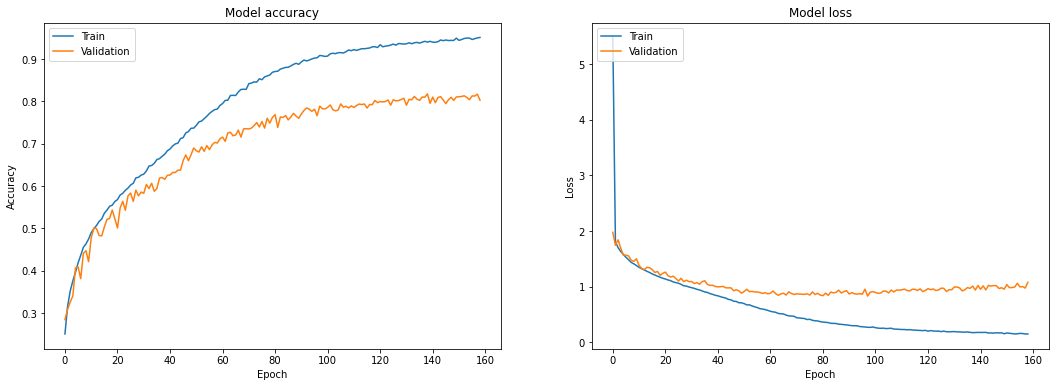

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(18, 6))

# Plot training & validation accuracy values

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
model_json = model.to_json()
with open("fer_zhangcnn.json", "w") as json_file:
    json_file.write(model_json)

In [35]:
import numpy as np
from sklearn.metrics import accuracy_score
predictions = model.predict(val_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_generator.classes
class_names = val_generator.class_indices.keys()

print("Model Accuracy on test set: {:.4f}".format(accuracy_score(y_test, y_pred)))

Model Accuracy on test set: 0.8084


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       990
           1       0.89      0.81      0.85       162
           2       0.74      0.83      0.78      1025
           3       0.88      0.96      0.92      1796
           4       0.85      0.73      0.79      1734
           5       0.81      0.76      0.78       414
           6       0.58      0.49      0.53       602

    accuracy                           0.81      6723
   macro avg       0.79      0.78      0.78      6723
weighted avg       0.81      0.81      0.80      6723



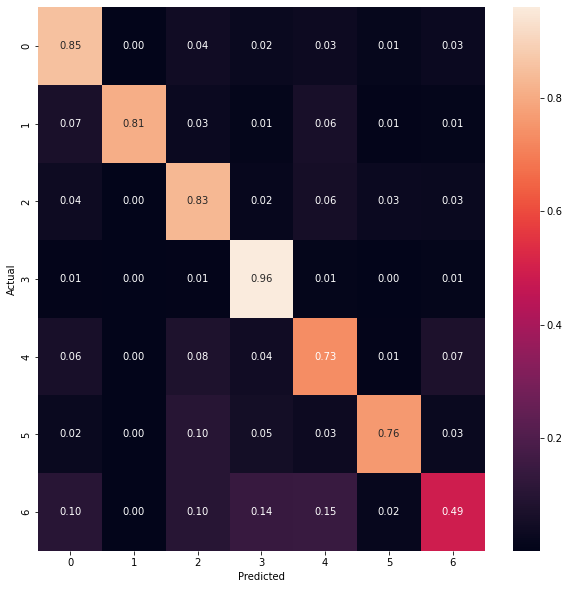

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)